**Generating plots**

Here, we will use the data obtained in the training and prediction section to plot confusion matrices, ROC curves, and the effects of the data size. Additionally, we will plot how well different classes are distinguishable from each other by applying PCA analysis to the laster layer of artificial neural networks (ANN).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import os as os
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  #import KMeans library from sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll
import time as time
from sklearn.neighbors import kneighbors_graph
from sklearn import mixture
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from torch.utils.data import Dataset, DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import torch.nn as nn
from sklearn.utils import shuffle
import random
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
from sklearn.model_selection import train_test_split
import matplotlib
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [ ]:
os.chdir('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/plots_GitHub')
data_fiber=pd.read_csv("/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Data_GitHub/Data_fiber.csv")#input directory for the data that contains all the subjects with and without fiber treatments
data_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Data_GitHub/Data_baseline.csv') #input directory for the Feces data that contains the subjects without fiber treatments
data_baseline_added_HIV = pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Data_GitHub/Data_baseline_added_basline.csv') #Reading the baseline augmented data

In [ ]:
###Five conditions predicted data
mat_pred_CNN_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_fiber_5_conditions.csv')
mat_pred_ANN_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_fiber_5_conditions.csv')
mat_pred_RF_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_fiber_5_conditions.csv')
mat_pred_SVM_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_fiber_5_conditions.csv')

mat_pred_CNN_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_baseline_5_conditions.csv')
mat_pred_ANN_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_baseline_5_conditions.csv')
mat_pred_RF_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_baseline_5_conditions.csv')
mat_pred_SVM_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_baseline_5_conditions.csv')


mat_pred_aug_ANN_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_baseline_augmented_5_conditions.csv')
mat_pred_aug_RF_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_baseline_augmented_5_conditions.csv')
mat_pred_aug_SVM_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_baseline_augmented_5_conditions.csv')


#####Healthy control and non-healthy predicted data
mat_pred_CNN_HC_NH_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_fiber_HC_NH.csv')
mat_pred_ANN_HC_NH_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_fiber_HC_NH.csv')
mat_pred_RF_HC_NH_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_fiber_HC_NH.csv')
mat_pred_SVM_HC_NH_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_fiber_HC_NH.csv')

mat_pred_CNN_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_baseline_HC_NH.csv')
mat_pred_ANN_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_baseline_HC_NH.csv')
mat_pred_RF_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_baseline_HC_NH.csv')
mat_pred_SVM_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_baseline_HC_NH.csv')



mat_pred_aug_ANN_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_baseline_augmented_HC_NH.csv')
mat_pred_aug_RF_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_baseline_augmented_HC_NH.csv')
mat_pred_aug_SVM_HC_NH_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_baseline_augmented_HC_NH.csv')


#####UC and CD predicted data
mat_pred_CNN_UC_CD_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_fiber_UC_CD.csv')
mat_pred_ANN_UC_CD_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_fiber_UC_CD.csv')
mat_pred_RF_UC_CD_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_fiber_UC_CD.csv')
mat_pred_SVM_UC_CD_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_fiber_UC_CD.csv')

mat_pred_CNN_UC_CD_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_CNN_baseline_UC_CD.csv')
mat_pred_ANN_UC_CD_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_ANN_baseline_UC_CD.csv')
mat_pred_RF_UC_CD_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_RF_baseline_UC_CD.csv')
mat_pred_SVM_UC_CD_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/predictions/predictions_vs_actual_SVM_baseline_UC_CD.csv')



**Plotting the predictions for five conditions**

Here we plot the confusion matrix for one fold in five fold predictions for both the fiber and baseline data

In [ ]:
mat_pred_CNN_fiber.columns

Index(['y_test_fold_0', 'y_pred_fold_0', 'y_score_class_0_fold_0',
       'y_score_class_1_fold_0', 'y_score_class_2_fold_0',
       'y_score_class_3_fold_0', 'y_score_class_4_fold_0', 'y_test_fold_1',
       'y_pred_fold_1', 'y_score_class_0_fold_1', 'y_score_class_1_fold_1',
       'y_score_class_2_fold_1', 'y_score_class_3_fold_1',
       'y_score_class_4_fold_1', 'y_test_fold_2', 'y_pred_fold_2',
       'y_score_class_0_fold_2', 'y_score_class_1_fold_2',
       'y_score_class_2_fold_2', 'y_score_class_3_fold_2',
       'y_score_class_4_fold_2', 'y_test_fold_3', 'y_pred_fold_3',
       'y_score_class_0_fold_3', 'y_score_class_1_fold_3',
       'y_score_class_2_fold_3', 'y_score_class_3_fold_3',
       'y_score_class_4_fold_3', 'y_test_fold_4', 'y_pred_fold_4',
       'y_score_class_0_fold_4', 'y_score_class_1_fold_4',
       'y_score_class_2_fold_4', 'y_score_class_3_fold_4',
       'y_score_class_4_fold_4'],
      dtype='object')

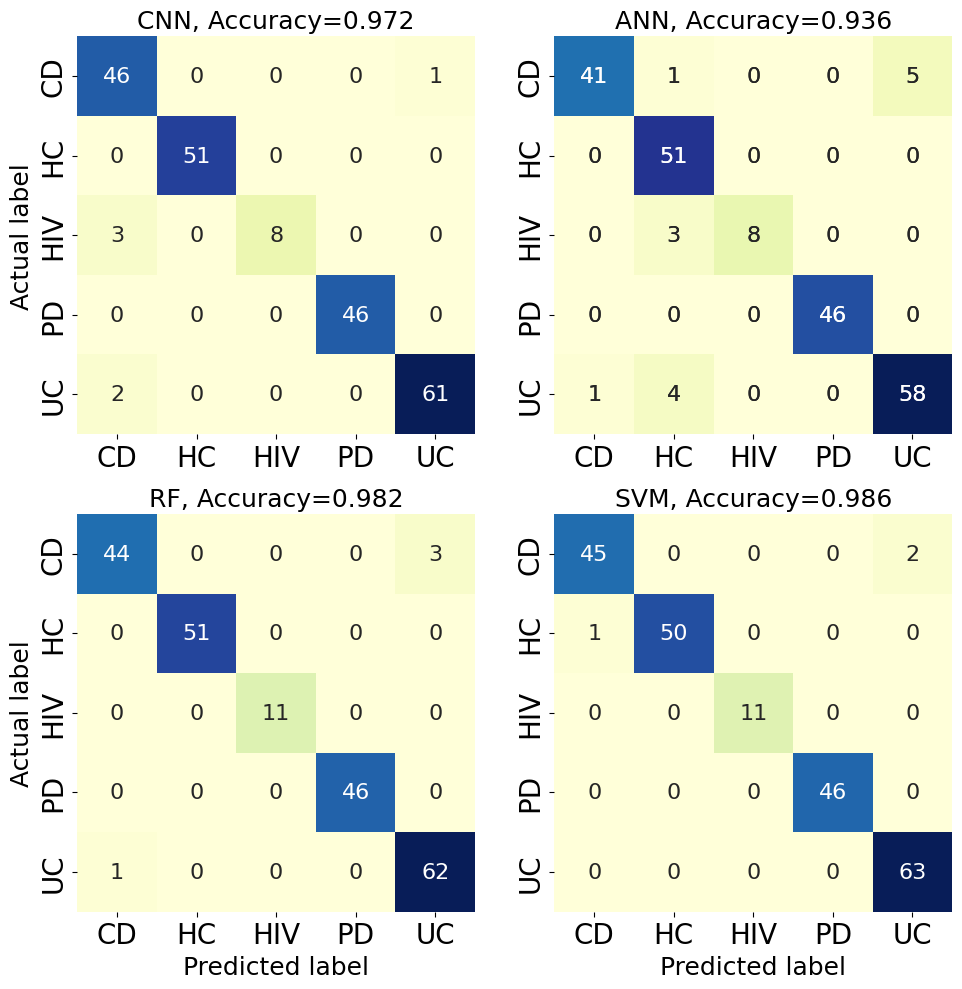

In [ ]:
data=data_fiber.copy()

condition_to_labels={}
labels_to_condition={}

for i in range(len(data)):
    if not data['condition'].iloc[i] in condition_to_labels:
       condition_to_labels[data['condition'].iloc[i]]=data['condition_codes'].iloc[i]

for i in range(len(data)):
    if not data['condition_codes'].iloc[i] in labels_to_condition:
       labels_to_condition[data['condition_codes'].iloc[i]]=data['condition'].iloc[i]
##sort data alphabetically for future savings to look nice you can remove this line if you want

       condition_to_labels = dict(sorted(condition_to_labels.items(), key=lambda item: item[1]))
##choose the values in the first fold for plotting
pred_col=22

true_col=21
##



fig, axs = plt.subplots(2, 2,figsize=(10,10))


mat_pred=mat_pred_CNN_fiber.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,0])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,0].set_title('CNN, Accuracy={:0.3f}'.format(score),fontsize=18)


mat_pred=mat_pred_ANN_fiber.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,1])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
#axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,1].set_title('ANN, Accuracy={:0.3f}'.format(score),fontsize=18)


mat_pred=mat_pred_ANN_fiber.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,1])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
#axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,1].set_title('ANN, Accuracy={:0.3f}'.format(score),fontsize=18)



mat_pred=mat_pred_RF_fiber.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[1,0])
score = accuracy_score(true_labels, pred_labels)

axs[1,0].set_xlabel('Predicted label'.format(score),fontsize=18)
axs[1,0].set_title('RF, Accuracy={:0.3f}'.format(score),fontsize=18)
axs[1,0].set_ylabel('Actual label'.format(score),fontsize=18)



mat_pred=mat_pred_SVM_fiber.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[1,1])
score = accuracy_score(true_labels, pred_labels)

axs[1,1].set_xlabel('Predicted label'.format(score),fontsize=18)
axs[1,1].set_title('SVM, Accuracy={:0.3f}'.format(score),fontsize=18)
#axs[1,1].set_ylabel('Actual label'.format(score),fontsize=18)


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.tight_layout()
fig.savefig('confusion_matrix_fiber.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)





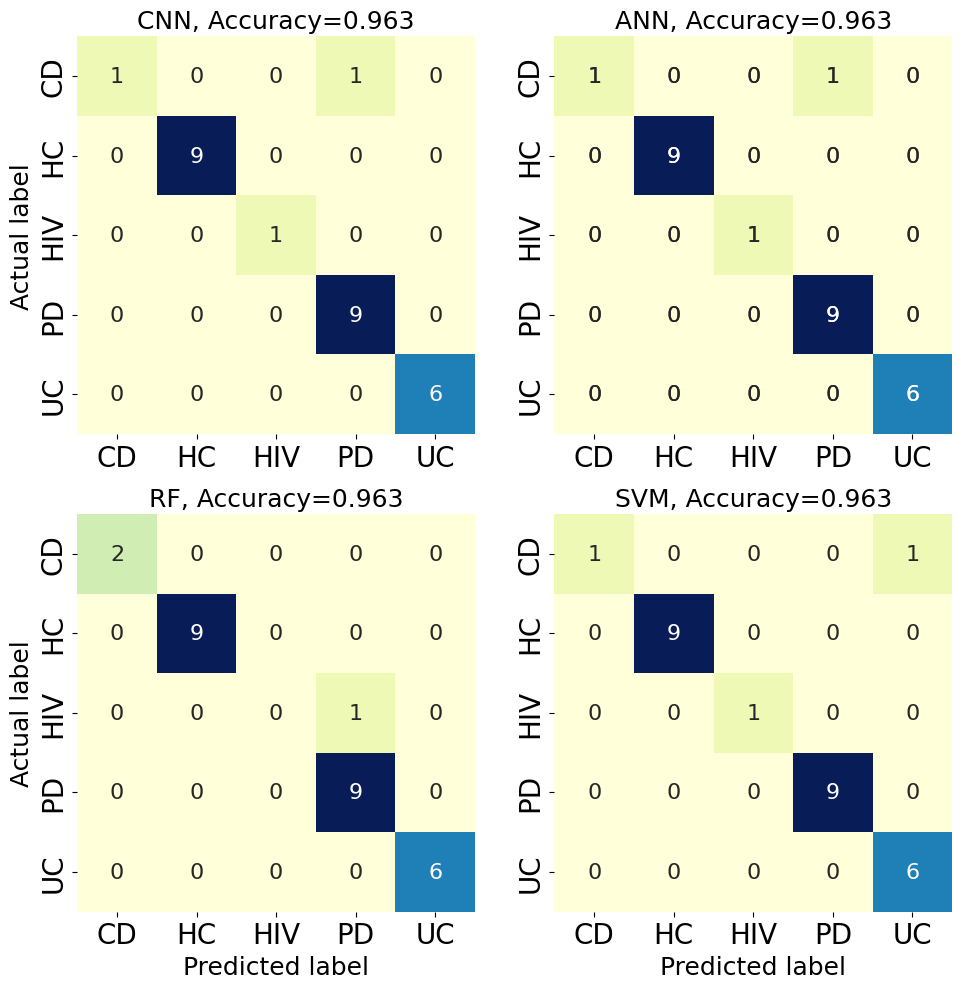

In [ ]:
data=data_baseline.copy()

condition_to_labels={}
labels_to_condition={}

for i in range(len(data)):
    if not data['condition'].iloc[i] in condition_to_labels:
       condition_to_labels[data['condition'].iloc[i]]=data['condition_codes'].iloc[i]

for i in range(len(data)):
    if not data['condition_codes'].iloc[i] in labels_to_condition:
       labels_to_condition[data['condition_codes'].iloc[i]]=data['condition'].iloc[i]
##sort data alphabetically for future savings to look nice you can remove this line if you want

       condition_to_labels = dict(sorted(condition_to_labels.items(), key=lambda item: item[1]))
##choose the values in the first fold for plotting
pred_col=22
true_col=21
##



fig, axs = plt.subplots(2, 2,figsize=(10,10))


mat_pred=mat_pred_CNN_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,0])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,0].set_title('CNN, Accuracy={:0.3f}'.format(score),fontsize=18)


mat_pred=mat_pred_ANN_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,1])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
#axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,1].set_title('ANN, Accuracy={:0.3f}'.format(score),fontsize=18)


mat_pred=mat_pred_ANN_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0,1])
score = accuracy_score(true_labels, pred_labels)

#axs[0,0].set_xlabel('Predicted label',fontsize=15)
#axs[0,0].set_ylabel('Actual label',fontsize=18)
axs[0,1].set_title('ANN, Accuracy={:0.3f}'.format(score),fontsize=18)



mat_pred=mat_pred_RF_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[1,0])
score = accuracy_score(true_labels, pred_labels)

axs[1,0].set_xlabel('Predicted label'.format(score),fontsize=18)
axs[1,0].set_title('RF, Accuracy={:0.3f}'.format(score),fontsize=18)
axs[1,0].set_ylabel('Actual label'.format(score),fontsize=18)



mat_pred=mat_pred_SVM_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[1,1])
score = accuracy_score(true_labels, pred_labels)

axs[1,1].set_xlabel('Predicted label'.format(score),fontsize=18)
axs[1,1].set_title('SVM, Accuracy={:0.3f}'.format(score),fontsize=18)
#axs[1,1].set_ylabel('Actual label'.format(score),fontsize=18)


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.tight_layout()
fig.savefig('confusion_matrix_baseline.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)





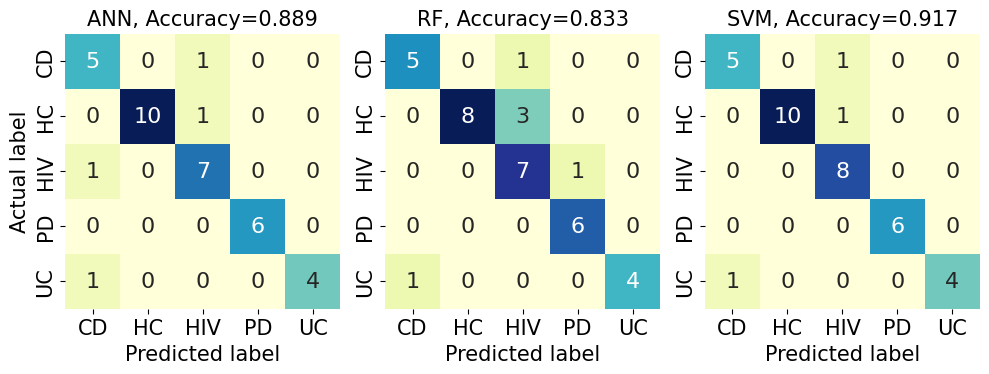

In [ ]:
data=data_baseline_added_HIV.copy()

#font size
fs=15

matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

condition_to_labels={}
labels_to_condition={}

for i in range(len(data)):
    if not data['condition'].iloc[i] in condition_to_labels:
       condition_to_labels[data['condition'].iloc[i]]=data['condition_codes'].iloc[i]

for i in range(len(data)):
    if not data['condition_codes'].iloc[i] in labels_to_condition:
       labels_to_condition[data['condition_codes'].iloc[i]]=data['condition'].iloc[i]
##sort data alphabetically for future savings to look nice you can remove this line if you want

       condition_to_labels = dict(sorted(condition_to_labels.items(), key=lambda item: item[1]))
##choose the values in the first fold for plotting
pred_col=22
true_col=21
##



fig, axs = plt.subplots(1, 3,figsize=(10,10))


mat_pred=mat_pred_aug_ANN_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[0])
score = accuracy_score(true_labels, pred_labels)

axs[0].set_xlabel('Predicted label',fontsize=fs)
axs[0].set_ylabel('Actual label',fontsize=fs)
axs[0].set_title('ANN, Accuracy={:0.3f}'.format(score),fontsize=fs)


mat_pred=mat_pred_aug_RF_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[1])
score = accuracy_score(true_labels, pred_labels)

axs[1].set_xlabel('Predicted label'.format(score),fontsize=fs)
axs[1].set_title('RF, Accuracy={:0.3f}'.format(score),fontsize=fs)
#axs[1].set_ylabel('Actual label'.format(score),fontsize=fs)


mat_pred=mat_pred_aug_SVM_baseline.copy()
pred_labels = mat_pred.iloc[:,pred_col].values
true_labels = mat_pred.iloc[:,true_col].values
cf_matrix=confusion_matrix(true_labels,pred_labels)

data_2 = pd.DataFrame(cf_matrix, list(condition_to_labels.keys()), list(condition_to_labels.keys()))
sns.heatmap(data_2, square=True, annot=True,cmap="YlGnBu", cbar = False,annot_kws={"size": 16},fmt='g',ax=axs[2])
score = accuracy_score(true_labels, pred_labels)

axs[2].set_xlabel('Predicted label'.format(score),fontsize=fs)
axs[2].set_title('SVM, Accuracy={:0.3f}'.format(score),fontsize=fs)
#axs[2].set_ylabel('Actual label'.format(score),fontsize=fs)




plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.tight_layout()
fig.savefig('confusion_matrix_baseline_augmented.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)


**Plotting the predictions for HC_NH and UC_CD**


Here we plot the confusion matrix for one fold in five fold predictions for both the fiber and baseline data

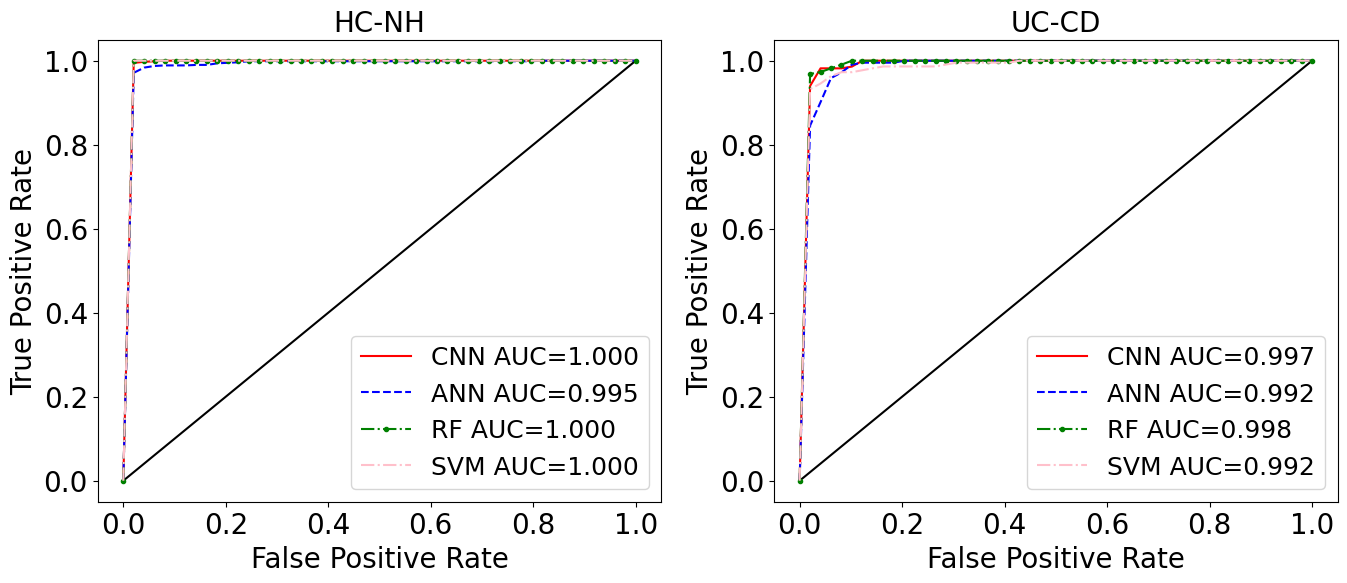

In [ ]:
####Fiber data
from scipy.interpolate import interp1d

fig, axs = plt.subplots(1, 2,figsize=(16,6))

class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_CNN_HC_NH_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_CNN_HC_NH_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs[0].plot(fpr,tpr,label='CNN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs[0].plot(y_d,y_d,color='black')
axs[0].set_title('HC-NH',fontsize=20)
axs[0].set_xlabel("False Positive Rate",fontsize=20)
axs[0].set_ylabel("True Positive Rate",fontsize=20)


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_ANN_HC_NH_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_ANN_HC_NH_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='blue')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='red')


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_RF_HC_NH_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_RF_HC_NH_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='green')



fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_SVM_HC_NH_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_SVM_HC_NH_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'-.',label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='pink')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='pink')
axs[0].legend(fontsize=18)








class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_CNN_UC_CD_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_CNN_UC_CD_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)



axs[1].plot(fpr,tpr,'-',label='CNN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs[1].plot(y_d,y_d,color='black')
axs[1].legend(fontsize=18)
axs[1].set_title('UC-CD',fontsize=20)
axs[1].set_xlabel("False Positive Rate",fontsize=20)
axs[1].set_ylabel("True Positive Rate",fontsize=20)


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_ANN_UC_CD_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_ANN_UC_CD_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='blue')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='red')


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_RF_UC_CD_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_RF_UC_CD_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')
#plt.fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='green')



fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_SVM_UC_CD_fiber[columns_of_interest[n]].values
    Y_test=mat_pred_SVM_UC_CD_fiber[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'-.',label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='pink')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='pink')
axs[1].legend(fontsize=18)

plt.savefig('auc_HC_NH_UC_CD_fiber', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)




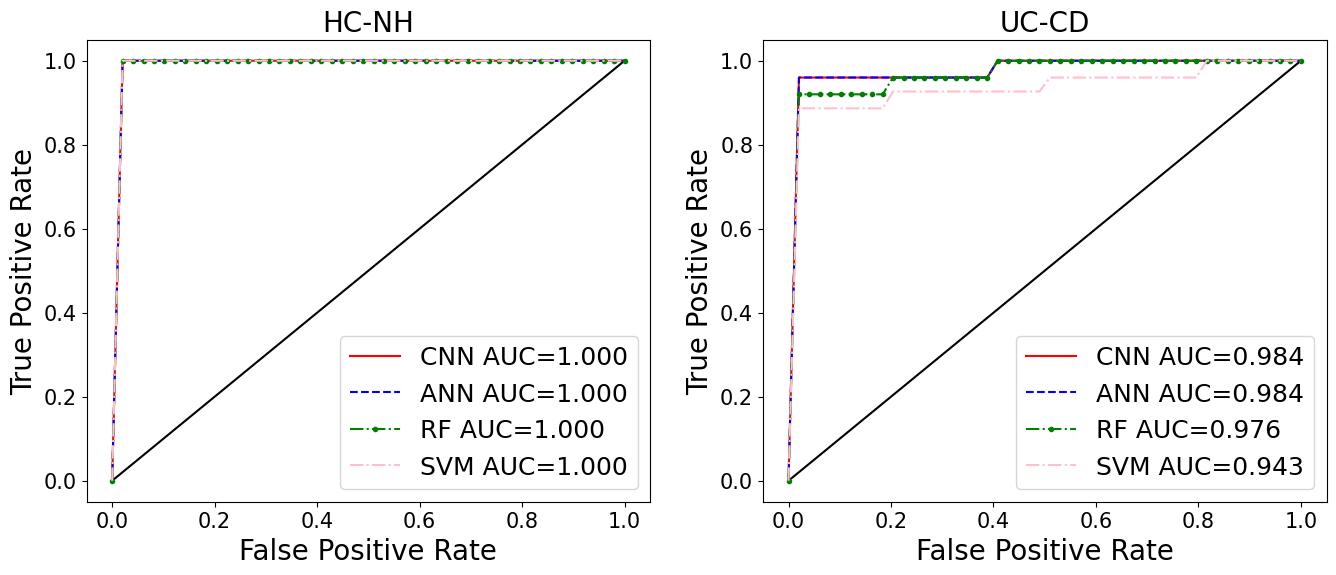

In [ ]:
####Baseline data
from scipy.interpolate import interp1d

fig, axs = plt.subplots(1, 2,figsize=(16,6))

class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_CNN_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_CNN_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs[0].plot(fpr,tpr,label='CNN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs[0].plot(y_d,y_d,color='black')
axs[0].set_title('HC-NH',fontsize=20)
axs[0].set_xlabel("False Positive Rate",fontsize=20)
axs[0].set_ylabel("True Positive Rate",fontsize=20)


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_ANN_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_ANN_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='blue')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='red')


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_RF_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_RF_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='green')



fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_SVM_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_SVM_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'-.',label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='pink')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='pink')
axs[0].legend(fontsize=18)




class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_CNN_UC_CD_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_CNN_UC_CD_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)



axs[1].plot(fpr,tpr,'-',label='CNN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs[1].plot(y_d,y_d,color='black')
axs[1].legend(fontsize=18)
axs[1].set_title('UC-CD',fontsize=20)
axs[1].set_xlabel("False Positive Rate",fontsize=20)
axs[1].set_ylabel("True Positive Rate",fontsize=20)


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_ANN_UC_CD_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_ANN_UC_CD_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='blue')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='red')


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_RF_UC_CD_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_RF_UC_CD_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')
#plt.fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='green')



fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_SVM_UC_CD_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_SVM_UC_CD_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[1].plot(fpr,tpr,'-.',label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='pink')
#axs[1].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='pink')
axs[1].legend(fontsize=18)

plt.savefig('auc_HC_NH_UC_CD_baseline', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)




**Augmented baseline data**


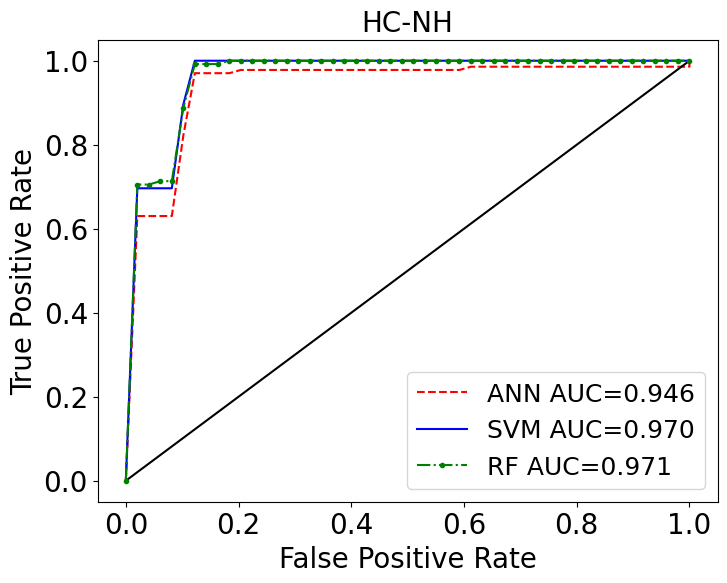

In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,6))

class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_aug_ANN_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_aug_ANN_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)

fpr=np.append(fpr, [1], axis=0)

tpr=np.append(tpr, [1], axis=0)

tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs.plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs.plot(y_d,y_d,color='black')
axs.set_title('HC-NH',fontsize=20)
axs.set_xlabel("False Positive Rate",fontsize=20)
axs .set_ylabel("True Positive Rate",fontsize=20)




fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_aug_SVM_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_aug_SVM_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()


tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs.plot(fpr,tpr,label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='blue')




fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_aug_RF_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_aug_RF_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs.plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')

axs.legend(fontsize=18)

plt.savefig('auc_HC_NH_baseline_aug', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)

In [ ]:
####Baseline data
from scipy.interpolate import interp1d

fig, axs = plt.subplots(1, 1,figsize=(16,6))

class_of_interest=1
n_of_folds=1
folds=[0,1,2,3,4]
columns_of_interest=[]
columns_of_interest_y=[]
for fold in folds:
    columns_of_interest.append('y_score_class_{}_fold_{}'.format(class_of_interest,fold))
    columns_of_interest_y.append('y_test_fold_{}'.format(fold))

fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]


mean_fpr = np.linspace(0, 1, 50)

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_CNN_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_CNN_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)


axs[0].plot(fpr,tpr,label='CNN AUC={:.3f}'.format(roc_aucs.mean()),color='red')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='blue')
y_d=np.linspace(0,1,10)
axs[0].plot(y_d,y_d,color='black')
axs[0].set_title('HC-NH',fontsize=20)
axs[0].set_xlabel("False Positive Rate",fontsize=20)
axs[0].set_ylabel("True Positive Rate",fontsize=20)


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_ANN_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_ANN_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'--',label='ANN AUC={:.3f}'.format(roc_aucs.mean()),color='blue')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='red')


fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_RF_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_RF_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'.-.',label='RF AUC={:.3f}'.format(roc_aucs.mean()),color='green')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='green')



fprs=[]
tprs=[]
roc_aucs=[]

fprs_len=[]

for n in range(len(columns_of_interest))[:]:
    Y_score=mat_pred_SVM_HC_NH_baseline[columns_of_interest[n]].values
    Y_test=mat_pred_SVM_HC_NH_baseline[columns_of_interest_y[n]].values
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)
    roc_auc=metrics.auc(fpr, tpr)
    tp_d = interp1d(fpr, tpr, kind='nearest')
    tpr =  tp_d(mean_fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

fpr=mean_fpr.copy()
tpr=np.mean(np.array(tprs),axis=0)
tpr_lower=np.mean(np.array(tprs),axis=0)-np.std(np.array(tprs),axis=0)
tpr_upper=np.mean(np.array(tprs),axis=0)+np.std(np.array(tprs),axis=0)
roc_aucs=np.array(roc_aucs)

axs[0].plot(fpr,tpr,'-.',label='SVM AUC={:.3f}'.format(roc_aucs.mean()),color='pink')
#axs[0].fill_between(fpr,tpr_lower,tpr_upper,alpha=0.2,color='pink')
axs[0].legend(fontsize=18)


**Plotting the last layer of ANN**

In [ ]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t
tanh=np.vectorize(tanh)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(138, 289)
(138, 60)
(138, 60)
0
1
2
3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(138, 289)
(138, 60)
(138, 60)
0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(54, 289)
(54, 60)
(54, 60)
0
1
(1092, 289)
(1092, 60)
(1092, 60)
0
1
2
3
4
(1092, 289)
(1092, 60)
(1092, 60)
0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(460, 289)
(460, 60)
(460, 60)
0
1


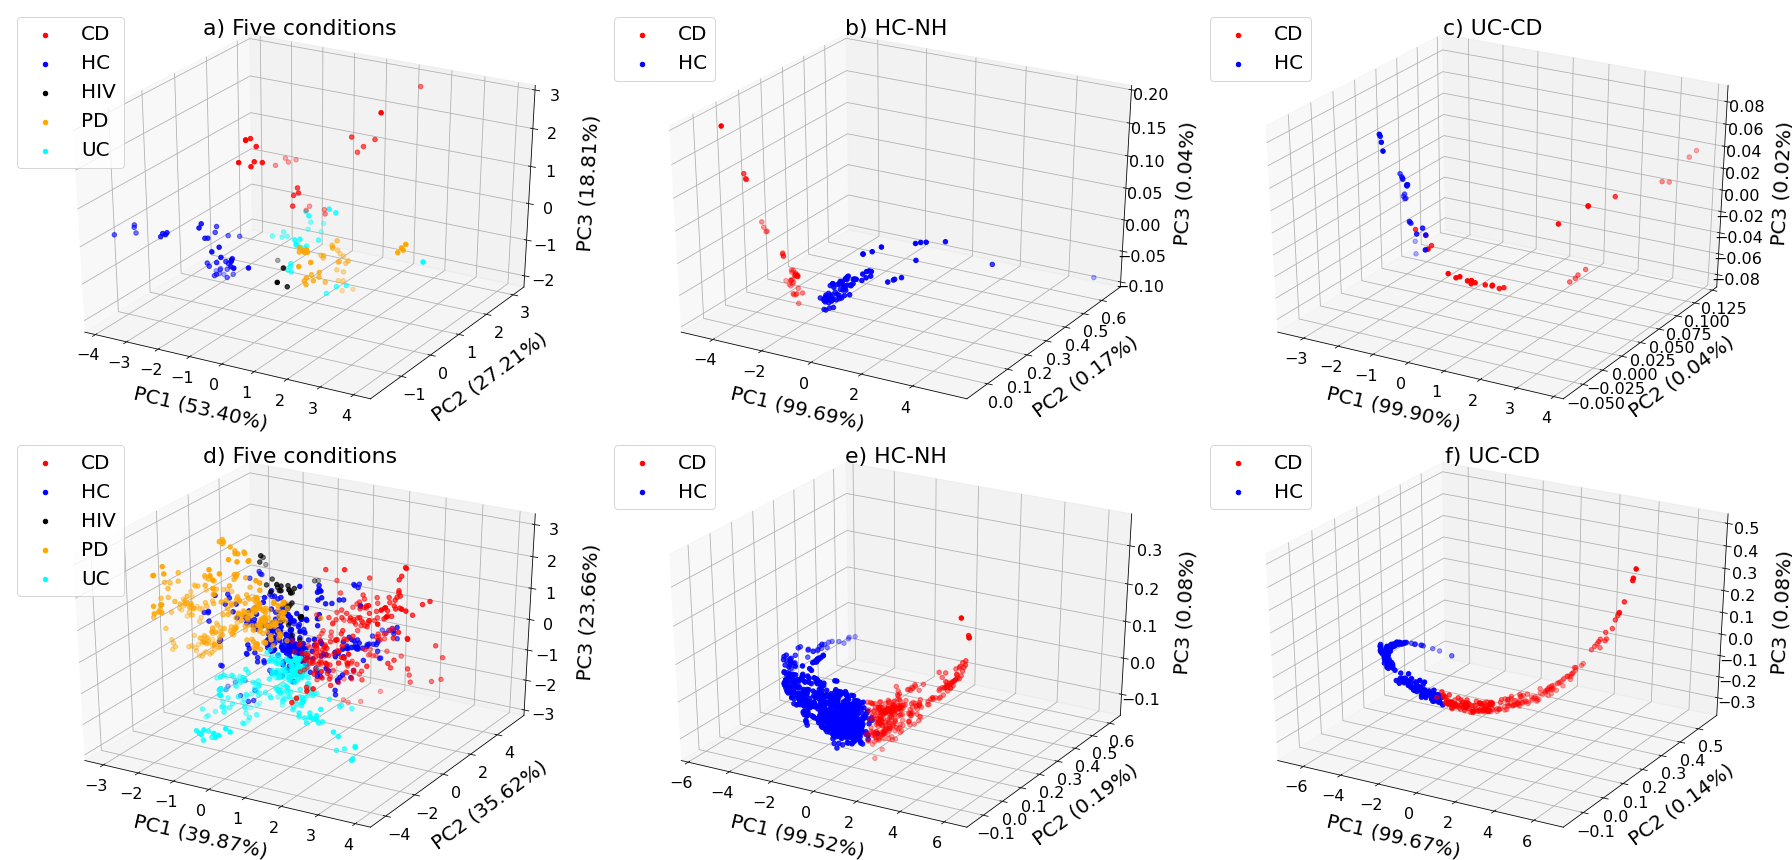

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)


#####plottting fuve conditions########
data=data_baseline.copy()
end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values


###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

gg=X.copy()
for l in range(3):
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)



classes_unique=np.unique(Y)

fig = plt.figure(figsize=(25,18))

#fig.subplots_adjust(left=0.5, right=0.5)

ax = fig.add_subplot(331,projection='3d')

colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('a) Five conditions',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)


####plotting HC_NH
##################
##################
data=data_baseline.iloc[:,:-1]
data['condition_codes']=data['condition'].values
for i in range(len(data)):
    if data.iloc[i,1]!='HC':
       data.iloc[i,1]='NH'

for i in range(len(data)):
    if data.iloc[i,1]=='HC':
       data.iloc[i,-1]=0
    else:
       data.iloc[i,-1]=1

data['condition_codes']=data['condition_codes'].astype(int)



end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values


###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

gg=X.copy()
for l in range(3):
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)

classes_unique=np.unique(Y)

ax = fig.add_subplot(332,projection='3d')


colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('b) HC-NH',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)


####plotting UC_CD
##################
##################
data=data_baseline.iloc[:,:-1]
array = ['UC', 'CD']
data=data[data['condition'].isin(array)]

data['condition_codes'] = data['condition'].values

for i in range(len(data)):
    if data.iloc[i,1]=='UC':
       data.iloc[i,-1]=0
    else:
       data.iloc[i,-1]=1

data['condition_codes']=data['condition_codes'].astype(int)



end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values

###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

gg=X.copy()
for l in range(3):
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)



classes_unique=np.unique(Y)

ax = fig.add_subplot(333,projection='3d')

colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('c) UC-CD',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)



######Five conditions####
###Fiber data
data=data_fiber.copy()
end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values


###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

gg=X.copy()
for l in range(3):
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)


classes_unique=np.unique(Y)

ax = fig.add_subplot(334,projection='3d')

colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('d) Five conditions',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)



####plotting HC_NH
##################
##################
data=data_fiber.iloc[:,:-4]
data['condition_codes']=data['condition'].values
for i in range(len(data)):
    if data.iloc[i,1]!='HC':
       data.iloc[i,1]='NH'

for i in range(len(data)):
    if data.iloc[i,1]=='HC':
       data.iloc[i,-1]=0
    else:
       data.iloc[i,-1]=1

data['condition_codes']=data['condition_codes'].astype(int)



end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values


###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
gg=X.copy()
for l in range(3):
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)



classes_unique=np.unique(Y)

ax = fig.add_subplot(335,projection='3d')

colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('e) HC-NH',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)




####plotting UC_CD
##################
##################
data=data_fiber.iloc[:,:-4]
array = ['UC', 'CD']
data=data[data['condition'].isin(array)]

data['condition_codes'] = data['condition'].values

for i in range(len(data)):
    if data.iloc[i,1]=='UC':
       data.iloc[i,-1]=0
    else:
       data.iloc[i,-1]=1

data['condition_codes']=data['condition_codes'].astype(int)



end_index=data.columns.get_loc("unassigned unassigned")+1
start_index=data.columns.get_loc("Abiotrophia")
columns_of_interest='condition_codes'
X=data.iloc[:,start_index:end_index].values
Y=data[columns_of_interest].values

###using the values of last fold for plotting
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for ii, (train, test) in enumerate(cv.split(X, Y)):
    X_train=X[train]
    Y_train=Y[train]
    X_test=X[test]
    Y_test=Y[test]

model = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (60, 60, 60, 60), learning_rate= 'constant', solver= 'adam',random_state=10)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

gg=X.copy()
for l in range(3):
    print(gg.shape)
    gg=tanh(np.matmul(gg, model.coefs_[l])+model.intercepts_[l])

pca = PCA(n_components=6)
X_pca=pca.fit_transform(gg)

classes_unique=np.unique(Y)

ax = fig.add_subplot(336,projection='3d')

colors=['red','blue','black','orange','cyan','yellow','green','purple','grey','darksalmon','crimson','olive','aliceblue','thistle','fuchsia','forestgreen','slategrey','teal','khaki','gold']
gamma=-1
YY=Y.reshape(-1)
for classs in classes_unique:
    indeces=np.where(YY==classs)
    y=YY[indeces[0]]
    x=X_pca[indeces[0],:]
    gamma=gamma+1
    cc=colors[gamma]
    ax.scatter(x[:,0],x[:,1],x[:,2],'*',c=cc, label=labels_to_condition[classs])

plt.legend(fontsize=20,loc='upper left',ncol=1)
plt.title('f) UC-CD',fontsize=22)

ax.set_xlabel('PC1'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),fontsize=20,labelpad=15)

ax.set_ylabel('PC2'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),fontsize=20,labelpad=15)
ax.set_zlabel('PC3'+' ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),fontsize=20,labelpad=15)


plt.tight_layout()


fig.savefig('visualization_last_layer.jpg', bbox_inches = 'tight', pad_inches = 0.2,dpi=1000)

In [ ]:
accuracies_CNN_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_CNN_fiber.csv')
accuracies_ANN_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_ANN_fiber.csv')
accuracies_RF_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_RF_fiber.csv')
accuracies_SVM_fiber=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_SVM_fiber.csv')


accuracies_CNN_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_CNN_baseline.csv')
accuracies_ANN_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_ANN_baseline.csv')
accuracies_RF_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_RF_baseline.csv')
accuracies_SVM_baseline=pd.read_csv('/content/drive/MyDrive/food_science_disease_prediction/For_GitHub/Results_GitHub/accuracies_vs_size/accuracies_SVM_baseline.csv')


In [ ]:
cls=list(accuracies_CNN_fiber.columns)
sizes = [x[10:] for x in cls]
sizes =np.array(sizes)
sizes_of_interest = sizes.astype(np.float).reshape(1,-1)[0]

sizes_of_interest_fiber = sizes.astype(np.float).reshape(1,-1)[0]



cls=list(accuracies_CNN_baseline.columns)
sizes = [x[10:] for x in cls]
sizes =np.array(sizes)
sizes_of_interest = sizes.astype(np.float).reshape(1,-1)[0]

sizes_of_interest_baseline= sizes.astype(np.float).reshape(1,-1)[0]

<ipython-input-9-bcb3f69092c3>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sizes_of_interest = sizes.astype(np.float).reshape(1,-1)[0]
<ipython-input-9-bcb3f69092c3>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sizes_of_interest_fiber = sizes.astype(np.float).reshape(1,-1)[0]
<ipython-input-9-bcb3f69092c3>:13: DeprecationWarning:

In [ ]:
data_CNN_fiber=accuracies_CNN_fiber.values[0]
data_ANN_fiber=accuracies_ANN_fiber.values[0]
data_SVM_fiber=accuracies_RF_fiber.values[0]
data_RF_fiber=accuracies_SVM_fiber.values[0]

data_CNN_baseline=accuracies_CNN_baseline.values[0]
data_ANN_baseline=accuracies_ANN_baseline.values[0]
data_SVM_baseline=accuracies_RF_baseline.values[0]
data_RF_baseline=accuracies_SVM_baseline.values[0]

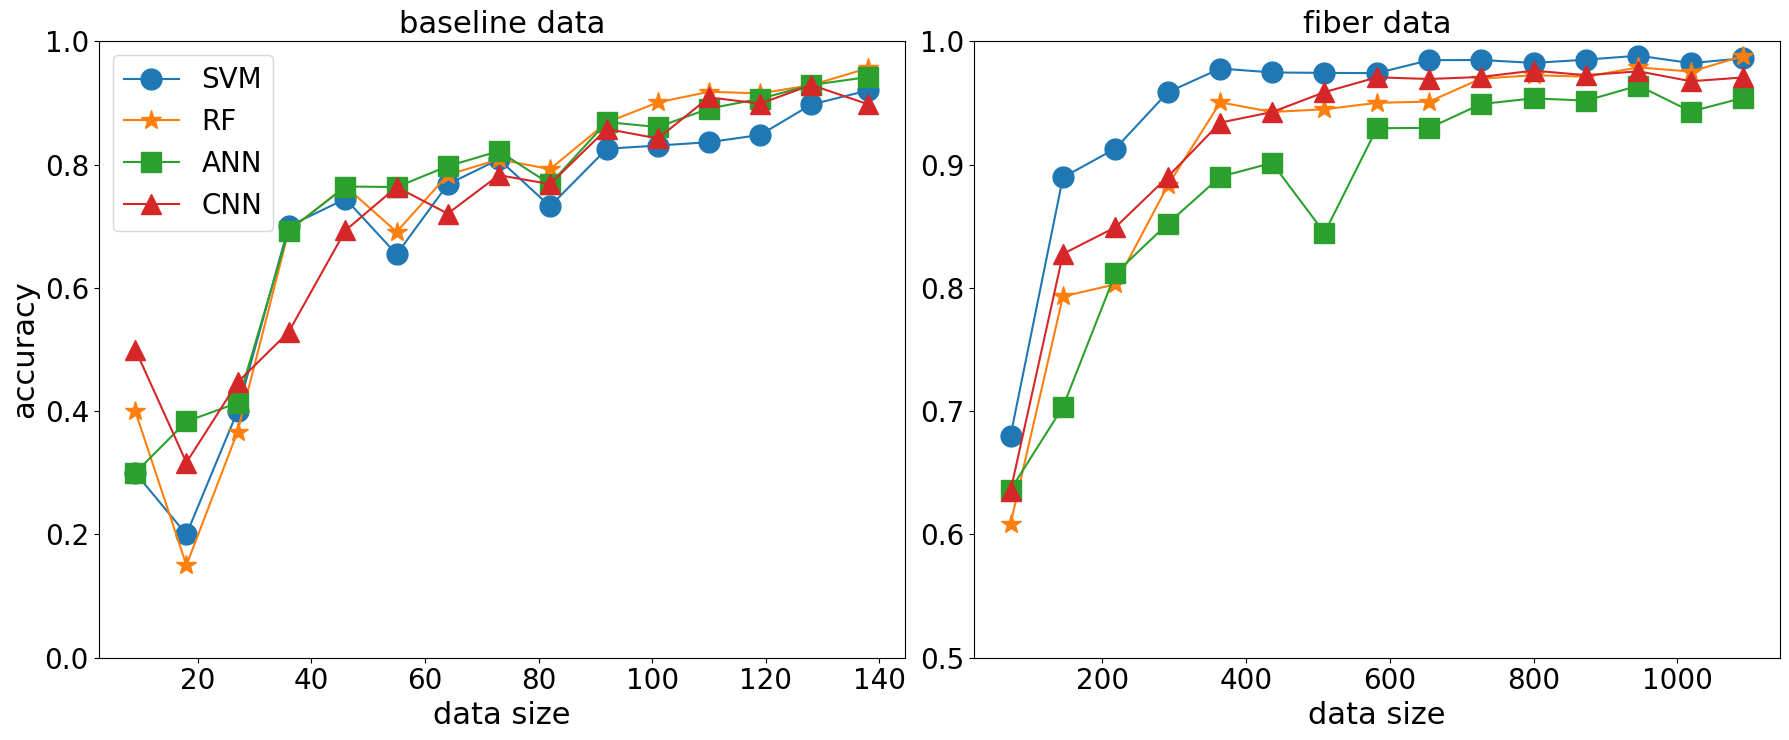

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(18,7.5))

axs[0].plot(sizes_of_interest_baseline,data_SVM_baseline,'-o', markersize=15,label='SVM')
axs[0].plot(sizes_of_interest_baseline,data_RF_baseline,'-*',markersize=15,label='RF')
axs[0].plot(sizes_of_interest_baseline,data_ANN_baseline,'-s',markersize=15,label='ANN')
axs[0].plot(sizes_of_interest_baseline,data_CNN_baseline,'-^',markersize=15,label='CNN')
axs[0].set_ylim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('data size',fontsize=22)
axs[0].set_ylabel('accuracy',fontsize=22)
axs[0].set_title('baseline data',fontsize=22)
axs[0].legend(fontsize=20)


axs[1].plot(sizes_of_interest_fiber,data_SVM_fiber,'-o', markersize=15,label='SVM')
axs[1].plot(sizes_of_interest_fiber,data_RF_fiber,'-*',markersize=15,label='RF')
axs[1].plot(sizes_of_interest_fiber,data_ANN_fiber,'-s',markersize=15,label='ANN')
axs[1].plot(sizes_of_interest_fiber,data_CNN_fiber,'-^',markersize=15,label='CNN')
axs[1].set_ylim([0.5, 1])
axs[1].set_xlabel('data size',fontsize=22)
#axs[1].set_ylabel('accuracy',fontsize=20)
axs[1].set_title('fiber data',fontsize=22)

fig.tight_layout()

plt.savefig('data_sizes_all.jpg', bbox_inches = 'tight',dpi=1000)